In [1]:
import os

import matplotlib.pyplot as plt

In [2]:
plt.style.use('../style/plots.mplstyle')

In [3]:
path_figure = os.path.join('svg', 'figureS15_parameters.svg')

In [4]:
def parameters_sequential(num_tasks, input_size, output_size, num_layers, num_hidden):
    num_params_input = num_hidden * (input_size + 1)
    num_params_hidden = num_hidden * (num_layers - 1) * (num_hidden + 1)
    num_params_output = output_size * (num_hidden + 1)
    return num_tasks * (num_params_input + num_params_hidden + num_params_output)

def parameters_parallel(num_tasks, input_size, output_size, num_layers, num_hidden):
    num_params_input = num_hidden * (input_size + 1)
    num_params_hidden = num_hidden * (num_layers - 1) * (num_hidden + 1)
    num_params_output = output_size * (num_hidden + 1)
    return num_params_input + num_params_hidden + num_tasks * num_params_output

def parameters_task_switching(num_tasks, input_size, output_size, num_layers, num_hidden):
    num_params_input = num_hidden * (input_size + num_tasks)
    num_params_hidden = num_hidden * (num_layers - 1) * (num_hidden + num_tasks)
    num_params_output = output_size * num_hidden
    return num_params_input + num_params_hidden + num_params_output

In [5]:
num_tasks = 10
num_layers = 10
num_hidden = 100
input_size = 784
output_size = 2

list_tasks = list(range(1, num_tasks + 1))

sequential = []
parallel = []
task_switching = []

for i_tasks in list_tasks:
    sequential.append(parameters_sequential(i_tasks, input_size, output_size, num_layers, num_hidden))
    parallel.append(parameters_parallel(i_tasks, input_size, output_size, num_layers, num_hidden))
    task_switching.append(parameters_task_switching(i_tasks, input_size, output_size, num_layers, num_hidden))


num_hidden = 1000
num_tasks = 100

parallel_deep = []
task_switching_deep = []

list_tasks_deep = [0, 20, 40, 60, 80, 100]

for i_tasks in list_tasks_deep:
    parallel_deep.append(parameters_parallel(i_tasks, input_size, output_size, num_layers, num_hidden))
    task_switching_deep.append(parameters_task_switching(i_tasks, input_size, output_size, num_layers, num_hidden))

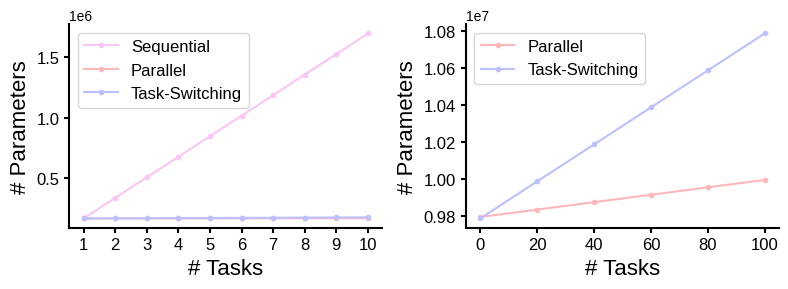

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(list_tasks, sequential, '.-')
ax[0].plot(list_tasks, parallel, '.-')
ax[0].plot(list_tasks, task_switching, '.-')

ax[0].legend(['Sequential', 'Parallel', 'Task-Switching'])
ax[0].set_xlabel('# Tasks', fontsize=16)
ax[0].set_ylabel('# Parameters', fontsize=16)
ax[0].tick_params(labelsize=12)
ax[0].xaxis.set_ticks(list_tasks)

# ax[1].plot(list_tasks, sequential, '.-')
next(ax[1]._get_lines.prop_cycler) 
ax[1].plot(list_tasks_deep, parallel_deep, '.-')
ax[1].plot(list_tasks_deep, task_switching_deep, '.-')

ax[1].legend(['Parallel', 'Task-Switching'])
ax[1].set_xlabel('# Tasks', fontsize=16)
ax[1].set_ylabel('# Parameters', fontsize=16)
ax[1].tick_params(labelsize=12)

fig.tight_layout()
fig.savefig(path_figure)
plt.show()